## LAB 5 - TASK 1 submission. ML 2022-23.


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**: Luis Calderón Robustillo 896238, Andrés Martínez Silva 904843

# TSNE to visualize deep feature space
In this task we are applying TSNE to visualize how certain deep descriptor (extracted from a pre-trained CNN for image classification) organizes our data.

## 0. Get your deep features

First, you need to extract the features you want to analyze for your image set. The following code can be used to help you do it. You have a more detailed description of it in https://keras.io/api/applications/
Most features won't be a *flat* vector when you get them, because they have the shape of that layer output, remember you need to flatten them to have a 1-d vector as feature for each image.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
print()

Mounted at /content/drive



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import backend as K

from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16

import matplotlib.pyplot as plt

In [7]:
# EXTRACT FEATURES from ANY pre-trained CNN (last layer before the classification)
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

import numpy as np

# YOU CAN LOAD YOUR PRE-TRAINED MODEL FROM LAB3 to see how your fine-tuned features look like
img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)

#model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
#model = VGG16(include_top=False, weights='imagenet')
#model_lab2 = tf.keras.models.load_model('/content/drive/MyDrive/MRGVC_reports/Machine Learning/Colab Notebooks/Lab_5/last_finetuned_model_V1.h5')
model_lab2 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/lab5/last_finetuned_model_V1.h5')

#data_dir = '/content/drive/MyDrive/MRGVC_reports/Machine Learning/Colab Notebooks/Lab_2/data/pets' # all in one folder and let the system do the split
data_dir = '/content/drive/MyDrive/ML/lab2/oxford-pet/pets'
img_path = data_dir + '/beagle/beagle_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model_lab2.predict(x)
print(features.shape)

# get features vector witha for with all the images

1/1 [==============================] - 1s 1s/step
(1, 5)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# You could EXTRACT ANY FEATURE FROM the CNN (explore model layer names with model.summary())
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.models import Model
import numpy as np

img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)

base_model = MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block_4_add').output)

#data_dir = '/content/drive/MyDrive/MRGVC_reports/Machine Learning/Colab Notebooks/Lab_2/data/pets' # all in one folder and let the system do the split
img_path = data_dir + '/beagle/beagle_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_features = model.predict(x)

print(block4_features.shape)

1/1 [==============================] - 0s 280ms/step
(1, 28, 28, 32)


In [10]:
# WRITE THE CODE YOU HAVE USED TO EXTRACT THE FEATURES
# Basically, a loop on the examples given above, that accumulates all
# flattened features in a numpy array, where each row is the feature of one image
# SAVE YOUR numpy matrix with all descriptors so you can try variations without computing them again
import os


#base_model = tf.keras.models.load_model('/content/drive/MyDrive/MRGVC_reports/Machine Learning/Colab Notebooks/Lab_5/last_finetuned_model_V1.h5')
base_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/lab5/last_finetuned_model_V1.h5')
base_model.summary()
model_lab2 = Model(inputs=base_model.input, outputs=base_model.get_layer('tf.math.subtract_1').output)

# Set your data directory
#data_dir = '/content/drive/MyDrive/MRGVC_reports/Machine Learning/Colab Notebooks/Lab_2/data/pets' # all in one folder and let the system do the split

# Set the target size for image resizing
img_width = 224
img_height = 224
IMG_SHAPE = (img_width, img_height) + (3,)

# Function to extract features for a single image
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Initialize variables to store features and labels
all_features = []

# Loop through each label folder
for label in os.listdir(data_dir):
    print("Processing " + label + " folder")
    label_path = os.path.join(data_dir, label)

    # Check if the entry is a directory
    if os.path.isdir(label_path):
        # Loop through each image in the label folder
        for img_file in os.listdir(label_path):
            if img_file.lower().endswith(".jpg"):

                img_path = os.path.join(label_path, img_file)
                # Extract features for the current image
                features = extract_features(img_path, model_lab2)
                # Append the features to the list
                all_features.append(features)

# Convert the lists to numpy arrays
features_matrix = np.array(all_features)

print(features_matrix.shape)

# Save the features matrix to a file
np.save('features_matrix.npy', features_matrix)




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                           

## 1. Run TSNE, visualize and analize the results

You could try any available implementation of TSNE.
We recommend the one from sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
or the one from TSNE author page (https://lvdmaaten.github.io/software/)

If you want to make nicer image mosaics, you can see the examples provided here (they are in Matlab, you'll have to write the equivalent in python)
https://cs.stanford.edu/people/karpathy/cnnembed/



### QUESTION TO DO in LAB5:
* Run TSNE twice, for two different feature extractors, i.e., extract all your features from two different layers, for your toy-dataset images (it could be two layers from the same model, or two layers one from each model). Play a bit with the parameters and configuration options until you think you have a decent visualization. **Note**: it's always recommended to run PCA (to reduce to around 50 long descriptors) before running TSNE. Comment on the code which params are you using. Save those images :-) You can just get plots of coloured points (according to their original class labels). If you would like to try to get nicer image-mosaics you can checkout numerous implementations online, but **it is not required for the lab**, e.g.:

    https://nextjournal.com/ml4a/image-t-sne

    https://github.com/YontiLevin/Embeddings2Image


* Discuss what you can see or sense from those results. How good are those features to represent your data? does it make sense compared to how good/bad the model was performing the image classification?


ANSWERS: [YOU ANSWER HERE] (max 6 lines)

(162, 5)
(162, 5)
(162, 2)
Processing american_pit_bull_terrier folder
Processing beagle folder
Processing american_bulldog folder
Processing Abyssinian folder
Processing basset_hound folder


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
<ipython-input-12-a24f297ef1ea>:52: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


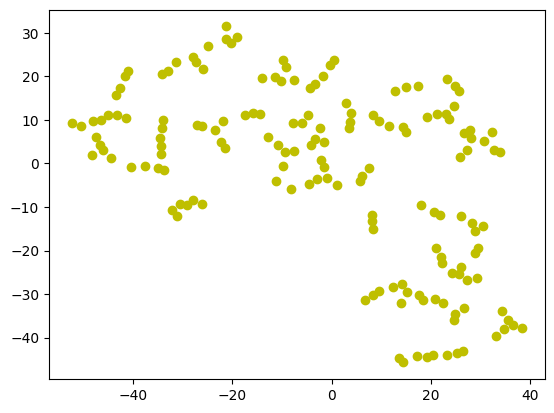

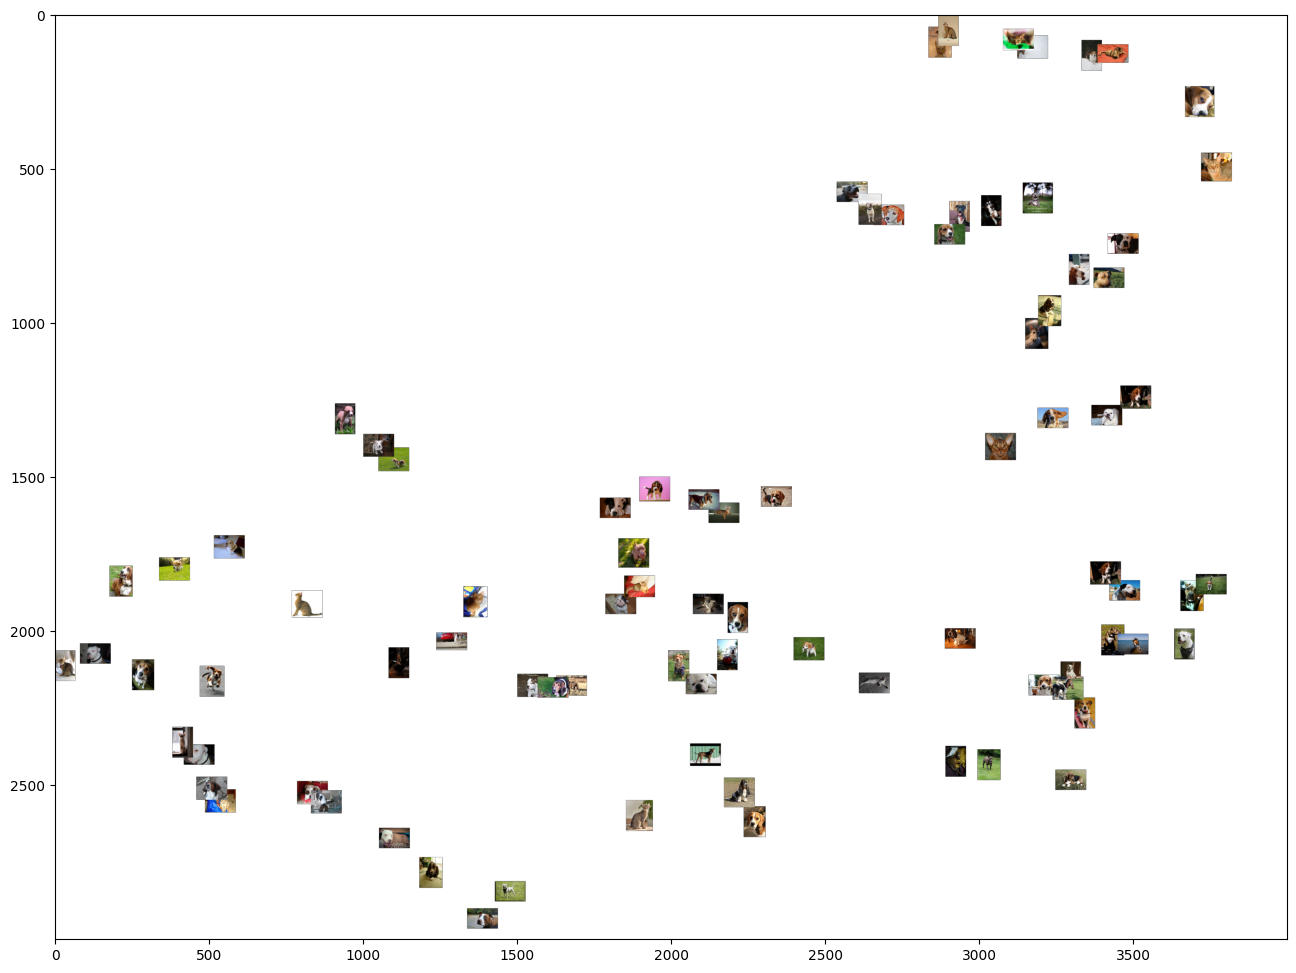

In [12]:
# LOAD YOUR FEATURES
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

%matplotlib inline
import matplotlib.pyplot
from matplotlib.pyplot import imshow
from PIL import Image

# RUN TSNE
#features_array = np.load("/content/drive/MyDrive/MRGVC_reports/Machine Learning/Colab Notebooks/Lab_5/features_matrix.npy")
features_array = np.load("/content/drive/MyDrive/Colab Notebooks/lab5/features_matrix.npy")
print(features_array.shape)
pca_50 = PCA(n_components=5)
pca_result_50 = pca_50.fit_transform(features_array)
print(pca_result_50.shape)

tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=5).fit_transform(pca_result_50)
print(tsne.shape)

scatter = plt.scatter(tsne[:,0], tsne[:,1], c='y')
handles, _ = scatter.legend_elements(prop='colors')

#####################
images = []
# Loop through each label folder
for label in os.listdir(data_dir):
    print("Processing " + label + " folder")
    label_path = os.path.join(data_dir, label)
    # Check if the entry is a directory
    if os.path.isdir(label_path):
        # Loop through each image in the label folder
        for img_file in os.listdir(label_path):
            if img_file.lower().endswith(".jpg"):
                img_path = os.path.join(label_path, img_file)
                images.append(img_path)

tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

# SAVE PLOTS/MOSAICS

*Discuss what you can see or sense from those results. How good are those features to represent your data? does it make sense compared to how good/bad the model was performing the image classification?*


In these results we can appreciate that the features visualized are not as good as expected. In particular, we can observe that the groups are not clearly limited in the five different classes.

In this way, this graph is not good to represent my data. The results of this layer does not resemble the results of the model itself, in which it differentiated the classes with a high degree of precision. This could be due to multiple reasons: unbalance between number of inputs per class, overfitting extracting irrelevant features of background, sizes, etc.
